# Customer Segmentation Project

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
dat = pd.read_csv("Mall_Customers.csv")
dat.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
dat.rename(columns={'Genre':'Gender'},inplace=True)

In [11]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
dat.shape

(200, 5)

In [13]:
dat.drop(['CustomerID'],axis=1,inplace=True)

In [14]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [15]:
dat.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [16]:
dat.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [17]:
dat.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

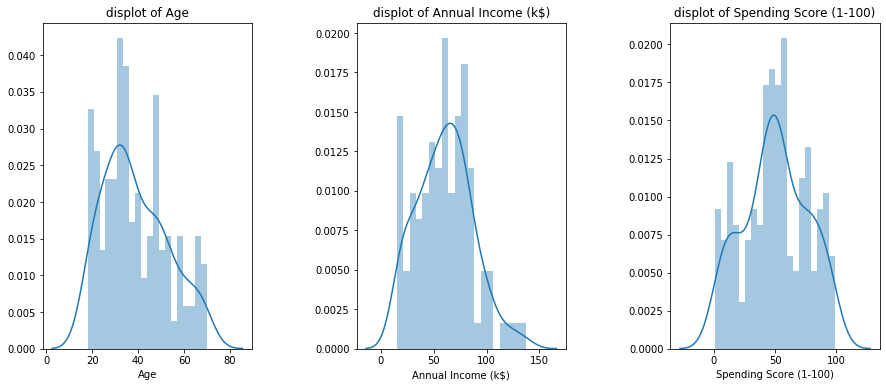

In [19]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(data[x],bins=20)
    plt.title('displot of {}'.format(x))
plt.show()


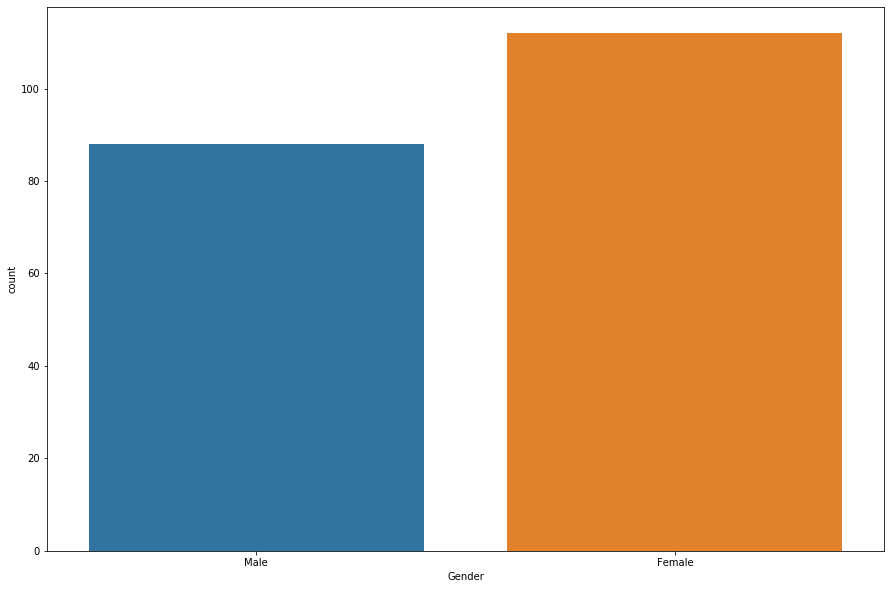

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x='Gender',data=dat)
plt.show()

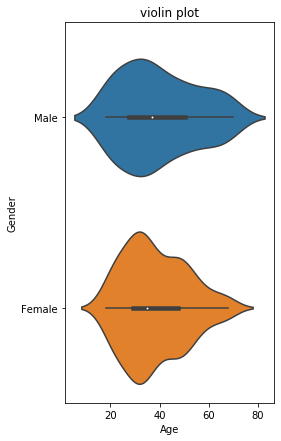

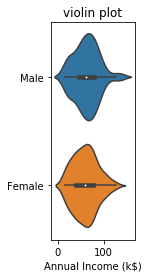

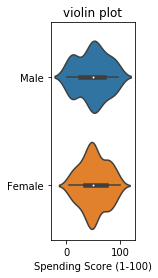

In [21]:
plt.figure(1,figsize=(15,7))
n=0
for a in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=a,y='Gender',data=dat)
    plt.ylabel('Gender' if n==1 else '' )
    plt.title('violin plot')
    plt.show()

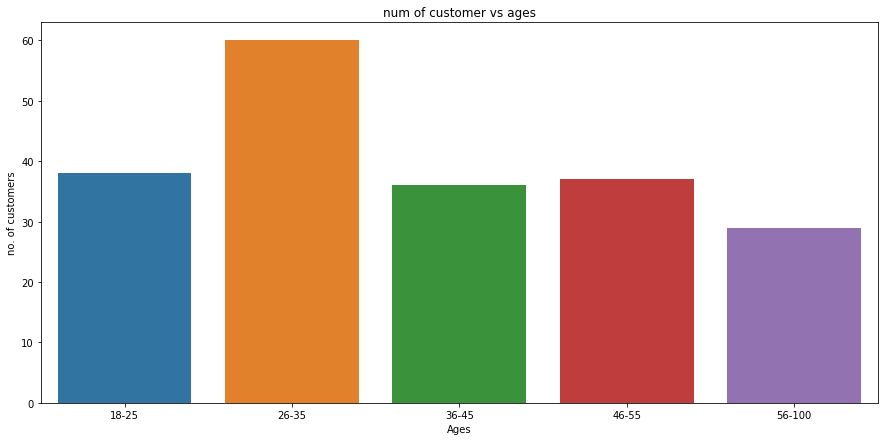

In [22]:
age_18_25=dat.Age[(dat.Age>=18)& (dat.Age<=25)] 
age_26_35=dat.Age[(dat.Age>=26)& (dat.Age<=35)] 
age_36_45=dat.Age[(dat.Age>=36)& (dat.Age<=45)] 
age_46_55=dat.Age[(dat.Age>=46)& (dat.Age<=55)] 
age_56_100=data.Age[(dat.Age>=56)& (dat.Age<=100)] 
agex = ['18-25','26-35','36-45','46-55','56-100']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_56_100.values)]
plt.figure(figsize=(15,7))
sns.barplot(x=agex, y=agey,data=data)
plt.title('num of customer vs ages')
plt.xlabel('Ages')
plt.ylabel('no. of customers')
plt.show()

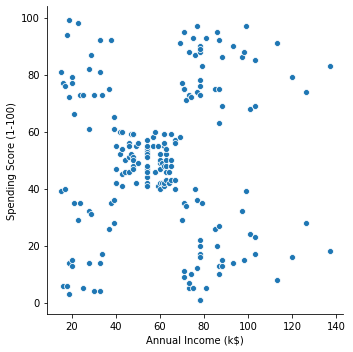

In [23]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=dat)

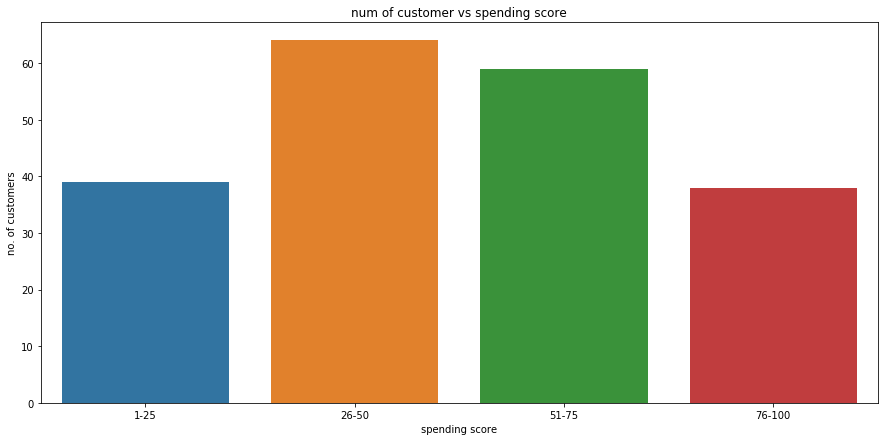

In [24]:
ss_1_25=dat['Spending Score (1-100)'][(dat['Spending Score (1-100)']>=1)& (dat['Spending Score (1-100)']<=25)] 
ss_26_50=dat['Spending Score (1-100)'][(dat['Spending Score (1-100)']>=26)& (dat['Spending Score (1-100)']<=50)] 
ss_51_75=dat['Spending Score (1-100)'][(dat['Spending Score (1-100)']>=51)& (dat['Spending Score (1-100)']<=75)] 
ss_76_100=dat['Spending Score (1-100)'][(dat['Spending Score (1-100)']>=76)& (dat['Spending Score (1-100)']<=100)] 
ssx = ['1-25','26-50','51-75','76-100']
ssy = [len(ss_1_25.values),len(ss_26_50.values),len(ss_51_75.values),len(ss_76_100.values)]
plt.figure(figsize=(15,7))
sns.barplot(x=ssx, y=ssy,data=dat)
plt.title('num of customer vs spending score')
plt.xlabel('spending score')
plt.ylabel('no. of customers')
plt.show()

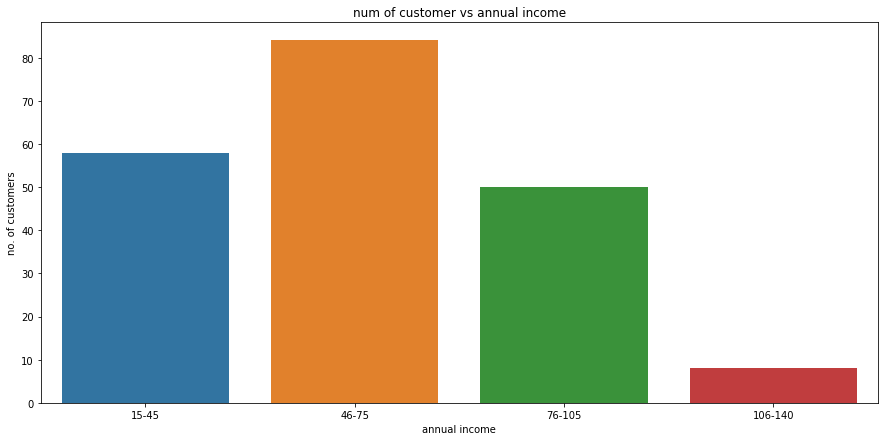

In [25]:
ai_15_45=dat['Annual Income (k$)'][(dat['Annual Income (k$)']>=15)& (dat['Annual Income (k$)']<=45)] 
ai_46_75=dat['Annual Income (k$)'][(dat['Annual Income (k$)']>=46)& (dat['Annual Income (k$)']<=75)] 
ai_76_105=dat['Annual Income (k$)'][(dat['Annual Income (k$)']>=76)& (dat['Annual Income (k$)']<=105)] 
ai_106_140=dat['Annual Income (k$)'][(dat['Annual Income (k$)']>=106)& (dat['Annual Income (k$)']<=140)] 
aix = ['15-45','46-75','76-105','106-140']
aiy = [len(ai_15_45.values),len(ai_46_75.values),len(ai_76_105.values),len(ai_106_140.values)]
plt.figure(figsize=(15,7))
sns.barplot(x=aix, y=aiy,data=dat)
plt.title('num of customer vs annual income')
plt.xlabel('annual income')
plt.ylabel('no. of customers')
plt.show() 

In [28]:
x1 = dat.iloc[:,[2,3]].values




# 

In [29]:
x1

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

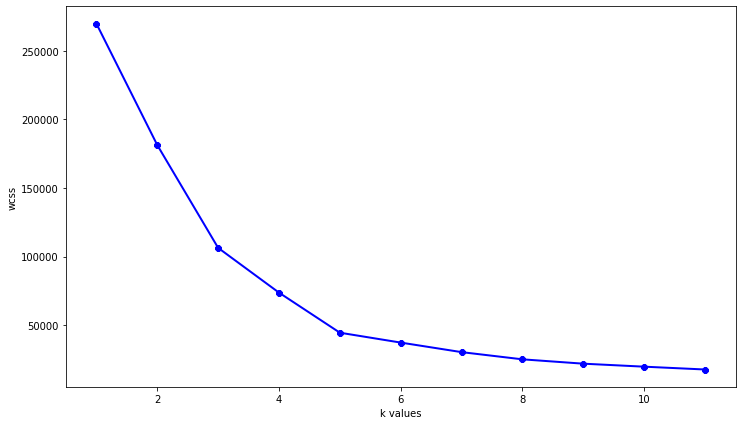

In [40]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,7)) 
plt.plot(range(1,12),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel('k values')
plt.ylabel('wcss')
plt.show()

In [43]:
kmeans=KMeans(n_clusters=5)
b= kmeans.fit_predict(x1)
print(b)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 3 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [44]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


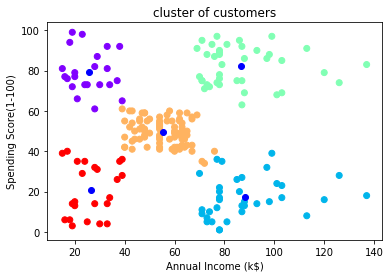

In [50]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='blue')
plt.title('cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [54]:
x2 = dat.iloc[:,[1,3]].values

In [52]:
x2

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

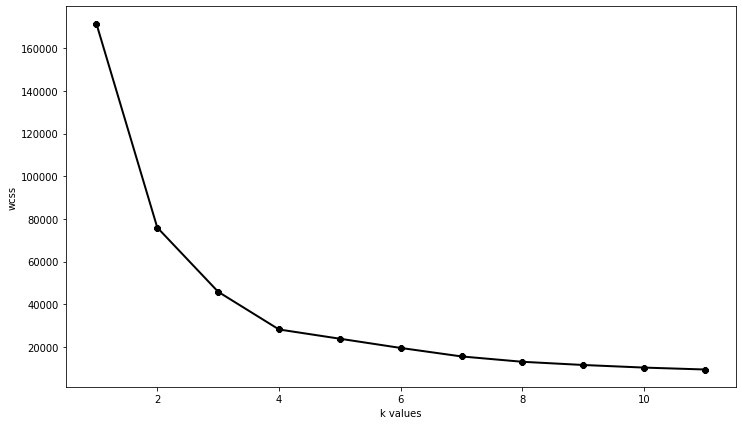

In [60]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,7)) 
plt.plot(range(1,12),wcss,linewidth=2,color='black',marker='8')
plt.xlabel('k values')
plt.ylabel('wcss')
plt.show()

In [61]:
kmeans=KMeans(n_clusters=4)
b2= kmeans.fit_predict(x2)
print(b2)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [62]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


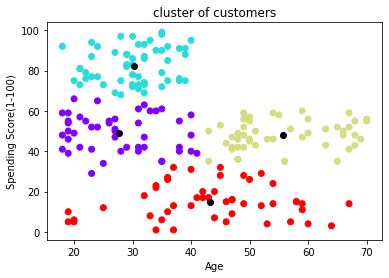

In [65]:
plt.scatter(x2[:,0],x2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('cluster of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()